# Decision Trees

Чек лист для изучения модели:

1. Как формулируется задача математически

3. Работа с данными

4. Желательно имплементировать модель самостоятельно через numpy (или torch)

5. Какие библиотеки содержат имплементации

6. Обучить на датасете

7. Как контролировать обучение модели

10. Бутстрапирование

## Пункт 1

Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил (которые называются предикатами).

Рассмотрим небольшой пример решающего дерева:

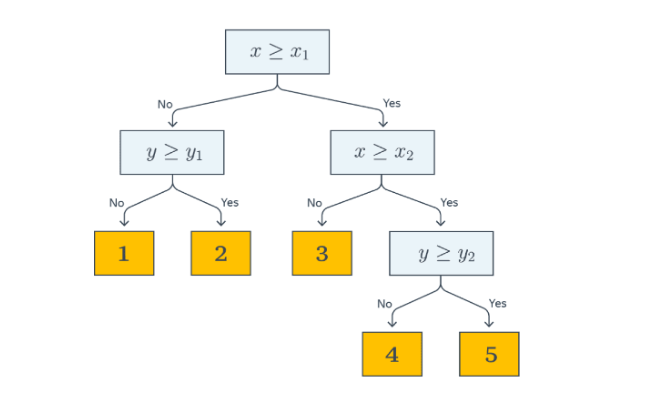

Решение о том, к какому классу будет отнесён текущий объект выборки, будет приниматься с помощью прохода от корня дерева к некоторому листу. В каждом узле этого дерева находится предикат. Если предикат верен для текущего примера из выборки, мы переходим в правого потомка, если нет — в левого. В данном примере все предикаты — это просто взятие порога по значению какого-то признака:

$B(x, j, t) = [x_j ≤ t]$

j - номер признака
t - порог

Пороги можно выбирать несколькими способами: 

*  пробегаться по множеству уникальных значений признака
*  отсортировать данные для конкретно взятого признака и отбирать средние значения соседей
*  если объектов много, можно среди отсортированных значений взять перцентили

### Построение решающего дерева

Дерево строится жадным образом:

Начнем со всей обучающей выборки $X$ и найдем наилучшее ее разбиение на две
части $X_1(j, t) = \left\{ {x | xj < t} \right\}$ и  $X_2(j, t) = \left\{ {x | xj > t} \right\}$ с точки зрения заранее заданного функционала качества $Q(X, j, t)$. Найдя наилучшие значения $j$ и $t$, создадим корневую вершину дерева, поставив ей в соответствие предикат $[x_j < t]$.

Объекты
разобьются на две части — одни попадут в левое поддерево, другие в правое. Для
каждой из этих подвыборок рекурсивно повторим процедуру, построив дочерние вершины для корневой, и так далее. В каждой вершине мы проверяем, не выполнилось
ли некоторое условие останова — и если выполнилось, то прекращаем рекурсию и
объявляем эту вершину листом. Когда дерево построено, каждому листу ставится в
соответствие ответ. В случае с классификацией это может быть класс, к которому
относится больше всего объектов в листе, или вектор вероятностей (скажем, вероятность класса может быть равна доле его объектов в листе). Для регрессии это может быть среднее значение, медиана или другая функция от целевых переменных объектов в листе. Выбор конкретной функции зависит от функционала качества в исходной задаче.

После того, как дерево построено, можно провести его стрижку (pruning) —
удаление некоторых вершин с целью понижения сложности и повышения обобщающей способности. Существует pre-pruning и post-pruning:

1. Pre-pruning - заранее говорим, что максимальная глубина дерева = n, максимально число листьев = n, в листьях может содеражаться не меньше k объектов. Иными словами заранее обговариваем, когда нам остановиться.

2. Post-pruning - мы уже построили дерево, скорее всего, оно переобученное и мы начинаем двигаться в обратном направлении и смотреть, какие вершины были лишние и мы можем схлопнуть их в одну.

Всё это редко используется, потому что сейчас решающие деревья редко используется в качестве отдельной модели.

### Критерии информативности

При построении дерева необходимо задать функционал качества, на основе которого осуществляется разбиение выборки на каждом шаге. Обозначим через $X_m$ множество объектов, попавших в вершину, разбиваемую на данном шаге, а через $X_ℓ$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном предикате. Мы будем использовать функционалы следующего вида:

$Q(X_m, j, t) = H(X_m) - \frac{|X_l|}{|X_m|}H(X_l) - \frac{|X_r|}{|X_m|}H(X_r)$

Это и есть наш критерий ветвления

"Веса" перед критериями информативности поддеревьев нужны, чтобы нам не было выгодно отделять по одному объекту от выборки

Здесь $H(X)$ — это критерий информативности (impurity criterion), который оценивает качество распределения целевой переменной среди объектов множества $X$. Чем меньше разнообразие целевой переменной, тем меньше должно быть значение критерия информативности — и, соответственно, мы будем пытаться минимизировать его значение. Функционал качества $Q(X_m, j, t)$ мы при этом будем максимизировать.

$H(X_m) = \underset{c ∈ Y}{min} \frac{1}{|X_m|}  \underset{(x_i, y_i) ∈ X}{Σ}L(y_i, c)$, 

где $L(y_i, c)$ — некоторая функция потерь, $c$ - ответы дерева

**Регрессия**

$H(X_m) = \underset{c ∈ Y}{min} \frac{1}{|X_m|} \underset{(x_i, y_i) ∈ X_m}{Σ} (y_i- c)^2$

Как мы уже знаем, оптимальным предсказанием константного классификатора для задачи минимизации MSE является среднее значение:

$c = \frac{Σy_i}{|X_m|}$

подставим в критерий:

$H(X_m) = \large \underset{(x_i, y_i) ∈ X_m}{Σ} \frac{(y_i- ŷ)}{|X_m|}^2$, где $ŷ$ - среднее значение

**Классификация**

**Ошибка классификации (не используется)**

Пусть в нашей задаче $K$ классов, а $p_k$ — доля объектов класса k в текущей вершине $X_m$:

$p_k = \frac{1}{|X_m|} \underset{(x_i, y_i) ∈ X_m}{Σ} [y_i = k]$

Тогда наш критерий информативности:

$H(X_m) = \large \underset{c ∈ Y}{min} \frac{1}{|X_m|} \underset{(x_i, y_i) ∈ X_m}{Σ} [y_i \neq c]$

Легко видеть, что оптимальным предсказанием тут будет наиболее популярный
класс $k_∗ $ — значит, критерий будет равен следующей доле ошибок:

$H(X_m) = \large \underset{c ∈ Y}{min} \frac{1}{|X_m|} \underset{(x_i, y_i) ∈ X_m}{Σ} [y_i \neq k_*] = 1 - p_k$





**Энтропия**

Если же мы собрались предсказывать вероятностное распределение классов $(c_1, c_2, ..., c_k)$, то к этому вопросу можно подойти так же, как мы поступали при выводе логистической регрессии: через максимизацию логарифма правдоподобия (= минимизацию минус логарифма). Пусть в вершине дерева предсказывается фиксированное распределение $c$ (не зависящее от $x_i$), тогда правдоподобие имеет вид:

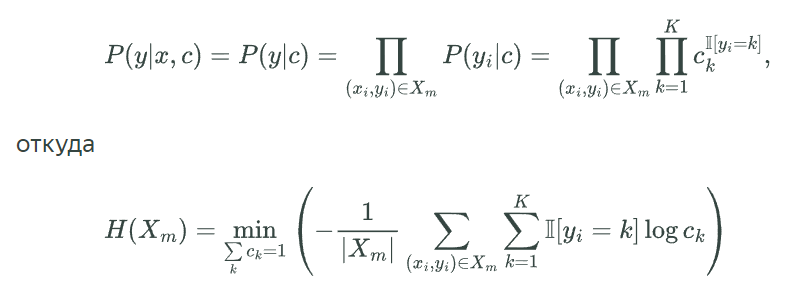

Подставляя вектор $c = (p_1, ... p_k)$ в выражение выше, мы в качестве информативности получим энтропию распределения классов:

$H(X_m) = - Σ_{k=1}^{K} p_k log(p_k)$

**Джинни**

Пусть предсказание модели — это распределение вероятностей классов $(c_1, ..., c_k)$. Вместо логарифма правдоподобия в качестве критерия можно выбрать, например, метрику Бриера (за которой стоит всего лишь идея посчитать MSE от вероятностей). Тогда информативность получится равной:

$H(X_m) = \underset{Σ_k c_k = 1}{min} \frac{1}{|X_m|} \underset{(x_i, y_i) ∈ X_m}{Σ} Σ_{k=1}^K (c_k - [y_i = k])^2$

Можно показать, что оптимальный вектор вероятностей состоит из долей классов $p_k$:

$c_∗ = (p_1, . . . , p_k)$

Если подставить эти вероятности в исходный критерий информативности и провести
ряд преобразований, то мы получим критерий Джини:

$H(X_m) = Σ_{k=1}^K p_k(1-p_k)$

## Пункт 2

### Категориальные признаки

Логично будет разбивать вершину на столько поддеревьев, сколько имеется возможных категориальных значений. Однако в таком случае дерево станет очень большим и велика вероятность переобучения.

Также сущетсвует иной подход:

Пусть какой-то категориальный признак имеет множество значений Z. Разобъём его на два непересекающихся подмножества: $Z = Z_1 \cup Z_2$. Предикат будет индикатором попадания в левое множество. Если попало в левое - идём влево, если не попало - в правое. Проблема такого разбиения в том, что нужно перебрать $2^{n-1} - 1$ вариантов разбиения, что очень много. 

В лушем случае стоит  использовать:

* One-Hot-Encoding
* Mean-Target-Encoding (какая доля объектов относится к классу +1, например, или упорядолчить значения по среднему ответу объектов для MSE-функционала).

### Пропуски

Если в выборке для некоторых объектов пропущены значения признака j, то их можно просто проигнорировать при вычислении функционала качества. Если данный предикат (то есть признак, где есть пропуски), окажется лучшим, то пропуски мы поместим в оба поддерева и можем присвоить им веса $\frac {|R_l|}{|R_m|}$

Другой вариант - суррогатные предикаты. Это предикаты, которые используют другой признак (где нет пропущенных значений), но дают практически такое же разбиение как в данном.

Также можно, как в линейных моделях, заполнять пропуски средними значениями, медианой, нулём. Либо присовить значения, которые являются больше, чем уже имеющиеся в признаке. И сделать такое разбиение, что все известные значения признака пойдут в левое поддерево, а неизвестные - в правое.

## Пункт 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier

In [2]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

In [3]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # проверка критерия остановы
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # находим лучший сплит
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # создаём поддеревья
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
        
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # считаем критерий информативности
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # энтропия предка
        parent_entropy = self._entropy(y)

        # энтропия потомков
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # взвешенная энтропия потомков
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # считаем информативность
        information_gain = parent_entropy - child_entropy
        return information_gain

    # разбиение на поддеревья
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # энтропия
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])

    # наиболее встречающийся класс
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    # предсказание
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    # обход дерева
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

## Пункты 4-6

In [4]:
!wget -O "train.csv" -q "https://www.dropbox.com/s/q8i2v0slgznh7ti/bill_authentication.csv?dl=0"

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.sample(3)

,Variance,Skewness,Curtosis,Entropy,Class
800,-2.0631,-1.51470,1.21900,0.44524,1
1247,-4.4775,-13.03030,17.08340,-3.03450,1
1052,-2.4198,-0.24418,0.70146,0.41809,1


In [7]:
train.isnull().any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class       False
dtype: bool

In [8]:
train.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [9]:
y = train['Class']
X = train.drop(columns='Class')

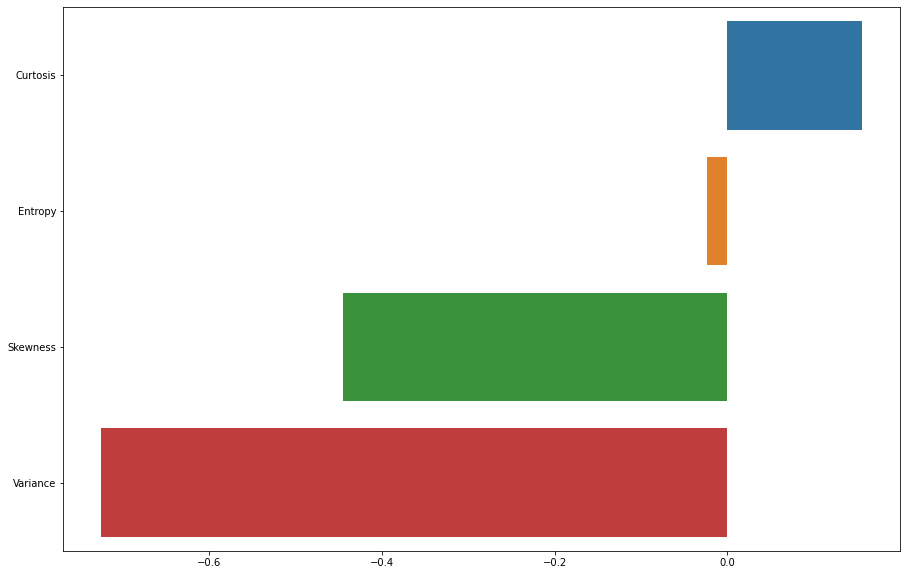

In [10]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

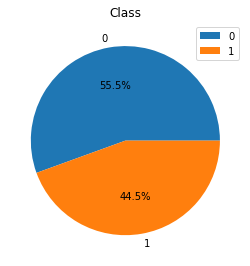

In [11]:
plt.figure(figsize =(20, 20))
data_i=y.value_counts()
plt.subplot(4,4,1)
plt.pie(data_i, labels = data_i.index, autopct='%1.1f%%')
plt.title('Class')
plt.legend()
None

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Sklearn Decision Tree

In [14]:
clf = DecisionTreeClassifier(max_depth = 5)

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

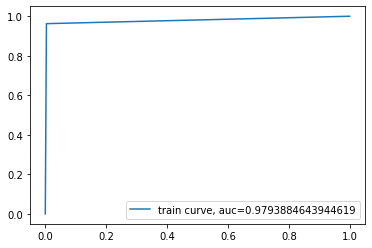

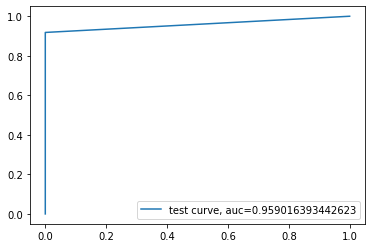

In [17]:
fpr, tpr, _ = metrics.roc_curve(y_train,  train_pred)
auc = metrics.roc_auc_score(y_train,  train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, test_pred)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))

print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))

print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))

print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))

f1_train =  0.9785714285714285
f1_test =  0.9572649572649572
recall_train =  0.9625292740046838
recall_test =  0.9180327868852459
precision_train =  0.9951573849878934
precision_test =  1.0
accuracy_train =  0.98125
accuracy_test =  0.9635922330097088


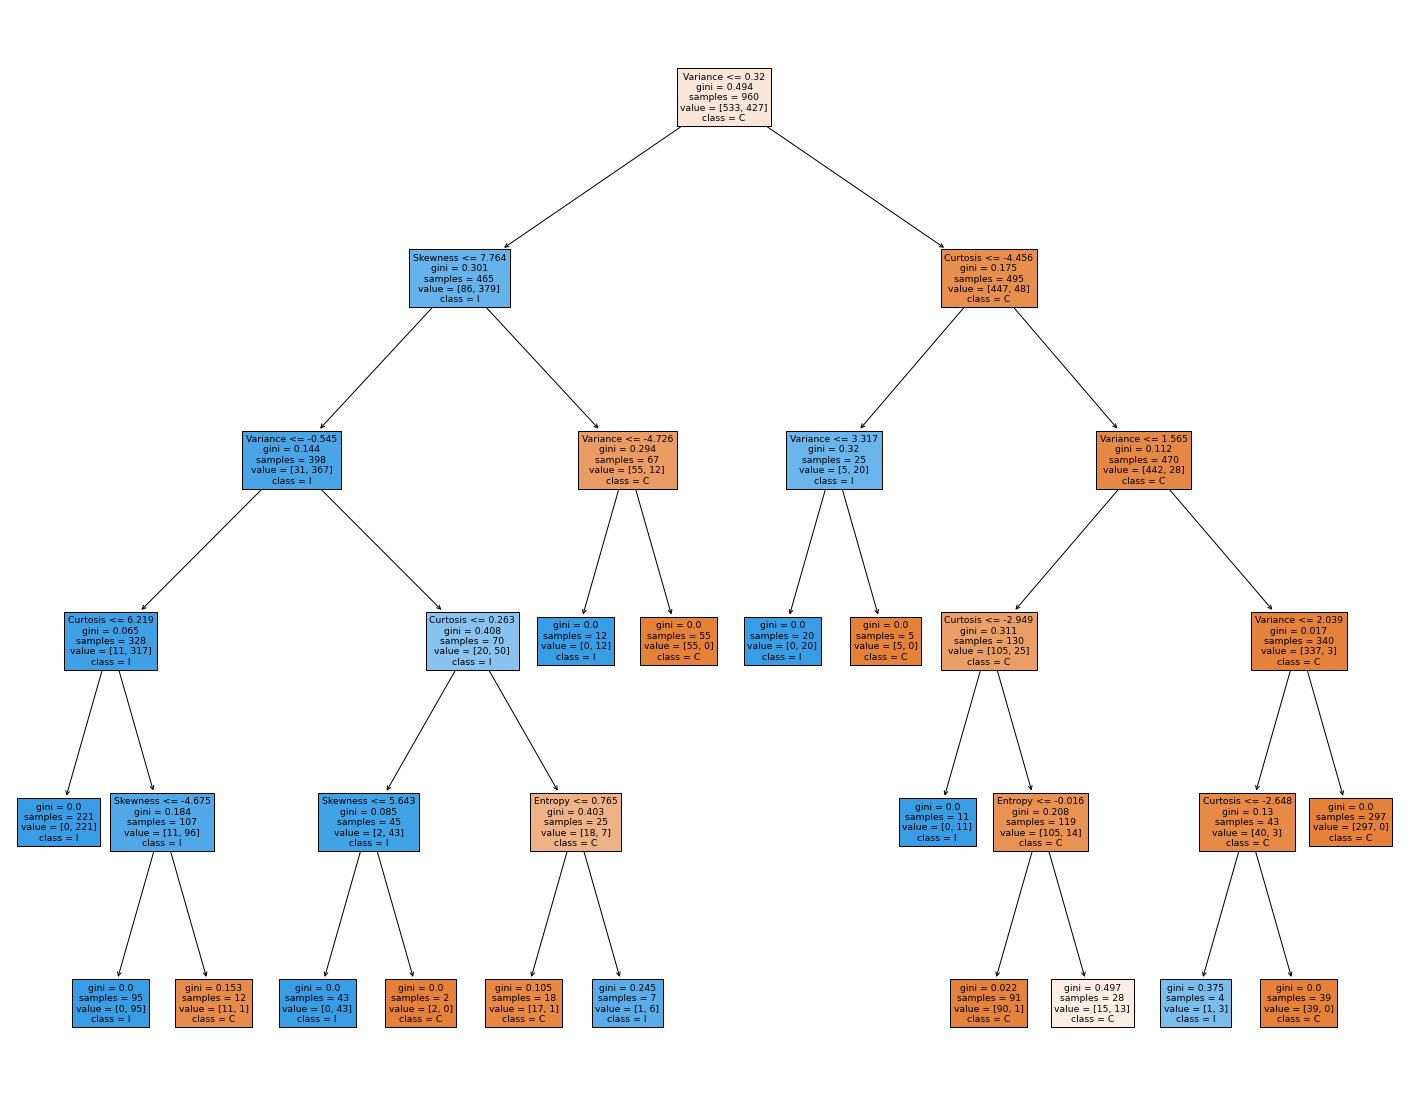

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names='Class',
                   filled=True)

### My Decision Tree

In [20]:
clf = DecisionTree(max_depth = 5)

In [21]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
clf.fit(X_train, y_train)

In [23]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

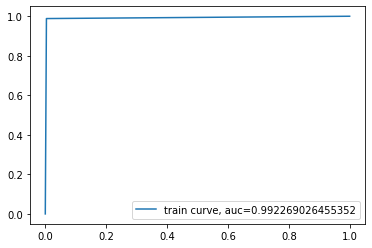

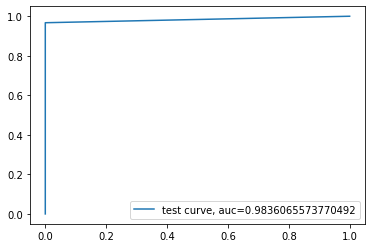

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_train,  train_pred)
auc = metrics.roc_auc_score(y_train,  train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, test_pred)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))

print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))

print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))

print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))

f1_train =  0.9917743830787309
f1_test =  0.9833333333333333
recall_train =  0.9882903981264637
recall_test =  0.9672131147540983
precision_train =  0.9952830188679245
precision_test =  1.0
accuracy_train =  0.9927083333333333
accuracy_test =  0.9854368932038835


Качество практически такое же, как у имплементации из sklearn

## Пункт 7

**Бутстрап**

Предположим у нас есть выборка $X$. Мы можем её сэмплировать, случайным образом доставать объекты. Идея бутстрапа состоит в том, чтобы вместо единоразового применения нашей выборки в обучении случайным образом "достать" объекты и получить $n$ выборок, причём доставать объекты будем с повторениями.

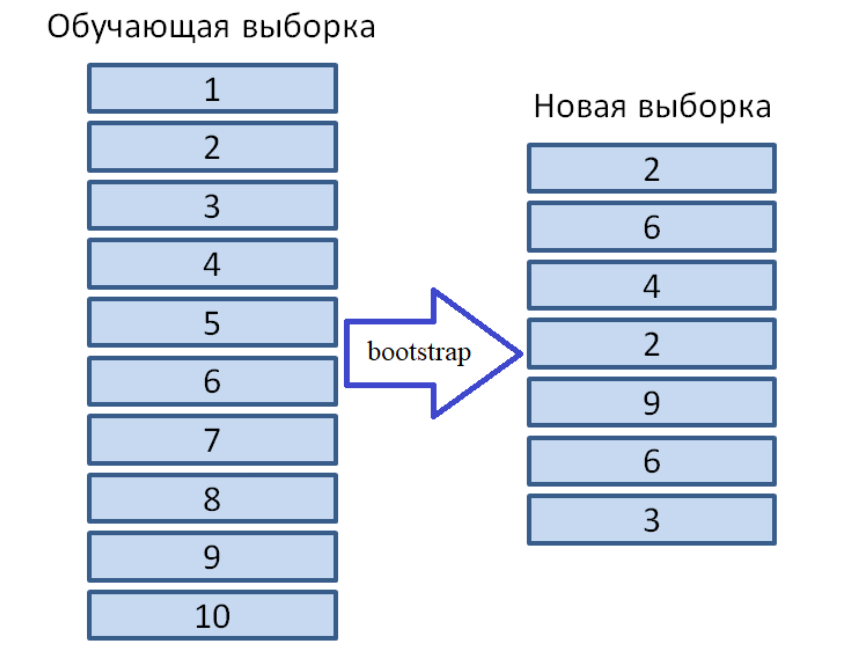

Теперь на каждой из $n$ выборок мы можем обучить нашу модель. Поскольку мы случайным образом доставали объекты, все датасеты отличаются. У нас получается $n$ различных моделей, для каждой из который мы можем посчитать ошибку. Соответсвенно мы можем усреднить ошибку всех моделей. Если наши ошибки несмещённые и нескоррелированные, то наша усреднённая ошибка в $n$ раз меньше, чем ошибка на каждой модели. 

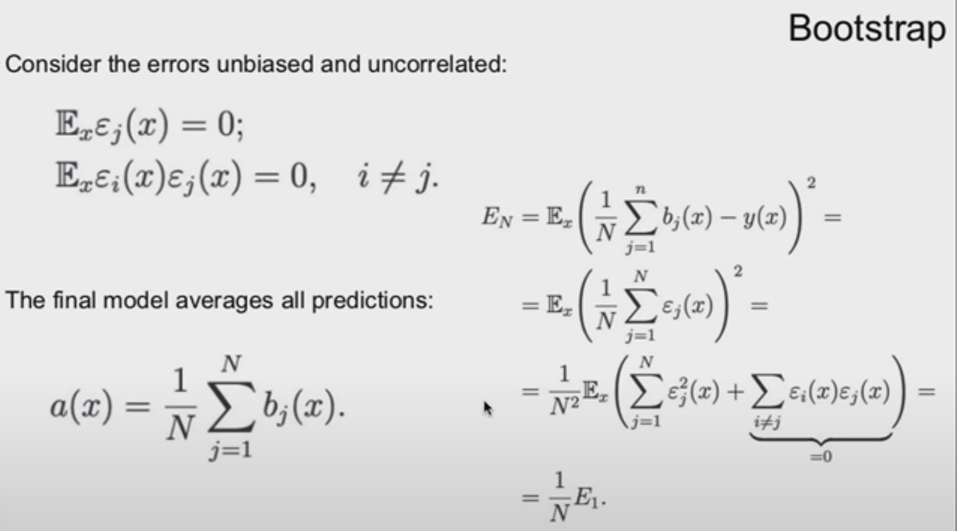

У нас есть $n$ независимых моделей, каждая из которых даёт какую-то несмещённую ошибку, тогда их сумма даст ошибку меньше, поскольку каждая модель ошибается в разную сторону случайным образом. Следовательно дисперсия падает, а смещение и так маленькое.  

Проблема в том, что это ложь, и на самом деле наши модели похожи, поскольку обучались хоть и на разных, но похожих датасетах. Однако этот трюк прокатит с деревьями, поскольку из-за разных выборок у нас разбиения предикаты скорее всего будут разные и сами разбиения соответсвенно тоже. Тогда модели будут всё-таки отличаться и мы сможем добиться уменьшения ошибки. 

In [26]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

base_est = DecisionTreeClassifier(max_depth = 5)

for n_estimators in estimator_range:

    clf = BaggingClassifier(base_estimator = base_est, n_estimators = n_estimators, random_state = 42)

    clf.fit(X_train, y_train)

    models.append(clf)
    scores.append(metrics.accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

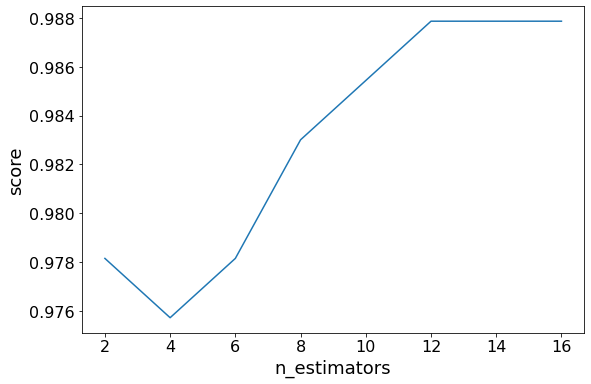

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

Перебирая различные значения, мы можем увидеть увеличение производительности модели с 97.6% до 98.8%.

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


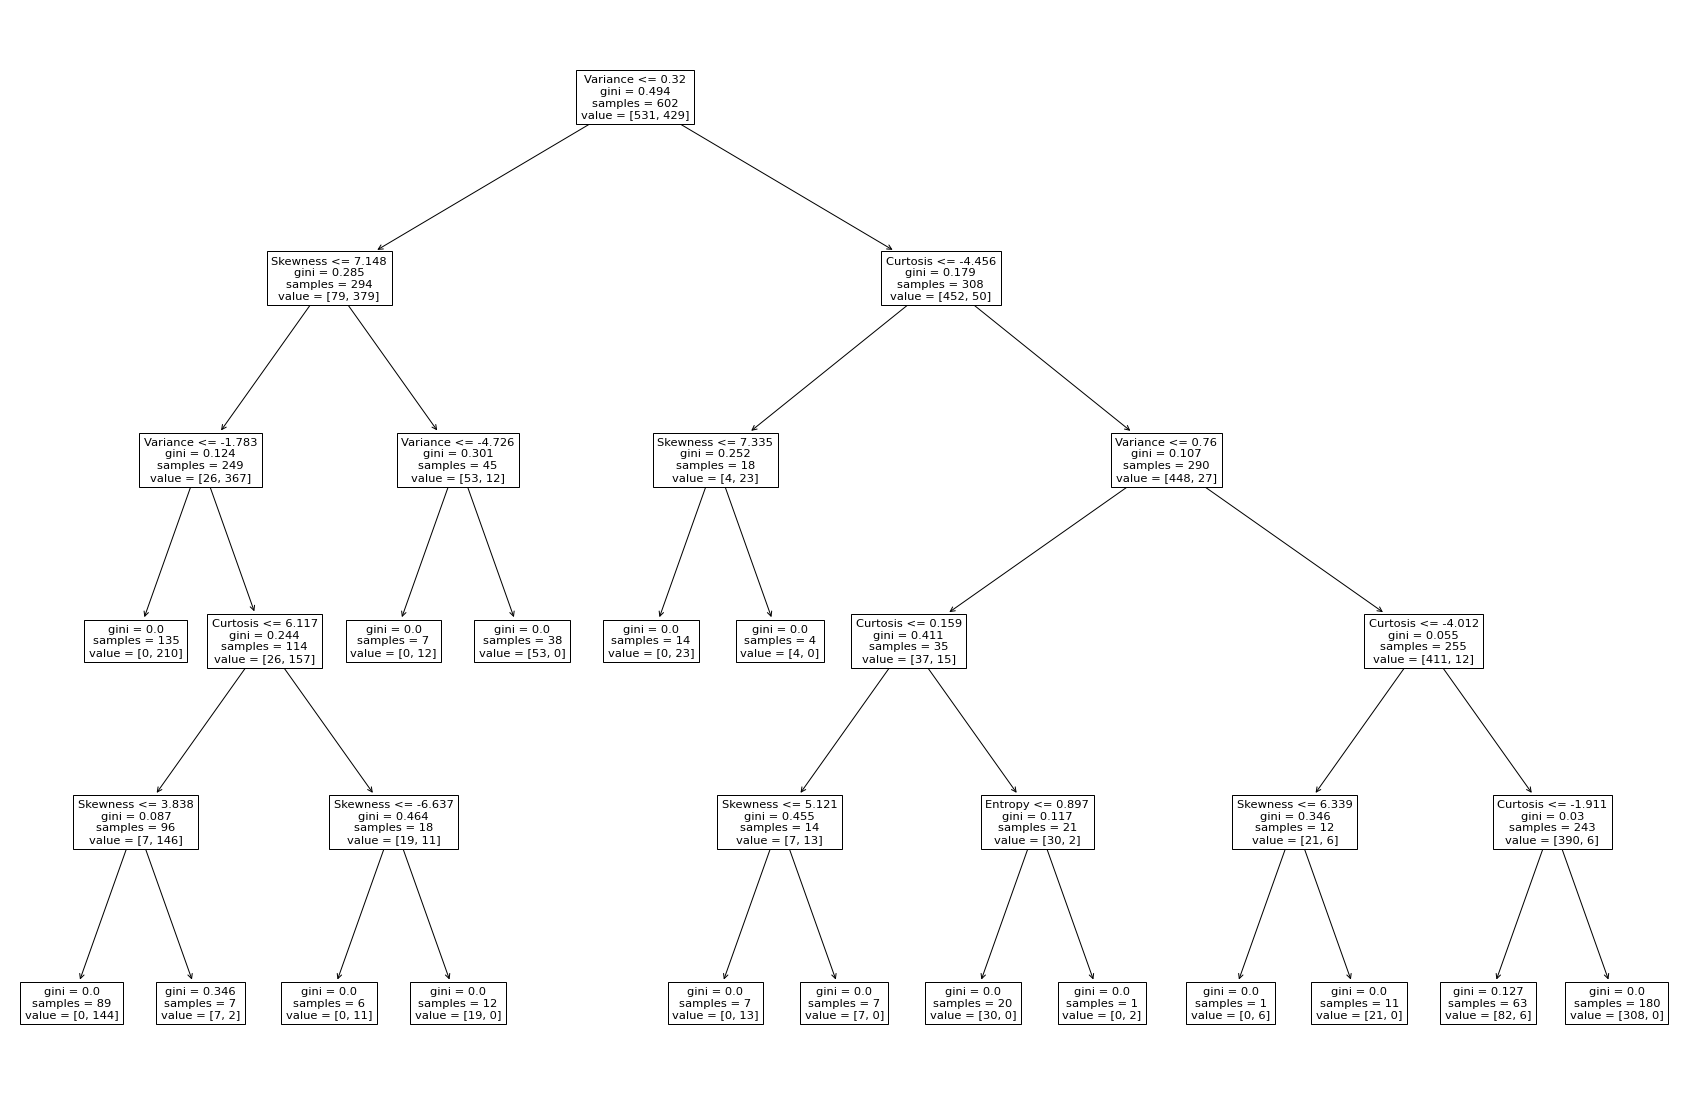

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

clf = BaggingClassifier(base_estimator = base_est, n_estimators = 14, oob_score = True, random_state = 42)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

tree.plot_tree(clf.estimators_[0], feature_names = X.columns)

None